In [1]:
%cd ..

/home/simone/Documents/uni/postdoc/projects/synaptic_filter


In [2]:
import numpy as np
import math
from matplotlib import pyplot as plt
import pandas as pd
import itertools as it
import scipy.stats as stats

from src.plotting import *
from src.update_functions import *
from src.init_functions import *
from src.run_functions import *

def expspace(a0, an, n=50):
    """ linspace in exp space """
    return (a0 * np.exp(np.log(an / a0) * np.linspace(0, 1, n)))

In [3]:
p = {
    't_num': 4000,                   # number of time steps (in dt) of simulation
    'dt': 0.001,                     # time step of sim
    'dim':2,                         # number of snypases / weights
    'tau':0.025,                     # membrane time const
    'g0':1,                          # base firing rate of neuron
    'beta':0.5,                      # steepness of exponentail gain function
    'mu_ou':0,                       # ou-mean of hidden weight
    'sig2_ou':1,                     # ou-variance of hidden weight
    'tau_ou':1000,                   # time scale of hidden weight
    'rule':'corr'                    # init learning rule used in sims
}                   

p['g0dt'] = p['g0']*p['dt'] 
                      
# STDP
#p['delta_T'] = 0.01  # for STDP experiments
#p['wait'] = 0.5 # s   # for STDP experiments
                      
# correlation protocol
#p['correlated_times'] = np.array([0, 0.01]) # s, two spikes   # for STDP experiments
                      
# bias
p['include-bias'] = False            # set first input to 1, making the first weight a bias
#p['sig2_oub'] = 1   # for STDP experiments
#p['tau_oub'] = 0.025   # for STDP experiments
#p['mu_oub'] = 1.0   # for STDP experiments
                      
# spike response
p['include-spike-response-kernel'] = True  # for refractory period, an exponentail
p['tau_alpha'] = 0.025  # time scale of refractory period
p['amplitude_alpha'] = -3/p['beta']   # amplitude of refractory exponential
                            
# single vector rules
p['tau_z'] = 1   # time scale of z-variable in z-approximation
p['tau_d'] = p['tau_ou'] # ?  # time scale of running mean for d-variable in approximation
p['tau_x_wiggle'] = p['tau_ou'] # time scale for averaging x
p['compute_sig2'] = False   # whether to report the trace of the appromximated variance, works only in 1-d
p['gamma_equal_g0'] = False   # whether to approximate the posterior firing rate by the base firing rate
                            
# performance sims:
p['epoch_num'] = 10  # number of tau-ou time scales in simulation
p['epoch_wait'] = 2  # burn-in, in tau-ou time scales
p['rate'] = 10 # Hz  # pre-synaptic firing rate

In [ ]:
p['tau_ou'] = 1
p['tau_d'] = 2  # should not matter here
p['tau_x_wiggle'] = 10 # should not move and represent some equilibrium approx.
p['g0'] = 20
p['beta'] = 0.1
p['dt'] = 0.001
p['epoch_num'] = 64
p['rate'] = 20 # Hz  # pre-synaptic firing rate
p['g0dt'] = p['g0']*p['dt'] 
p['tau'] = 2

p['include-spike-response-kernel'] = False
p['include-bias'] = False

p['block_input'] = True
p['num_blocks'] = 8
p['block_size'] = 8
p['dim'] = p['num_blocks'] * p['block_size']
p['block_period'] = 1

p['rule'] = 'corr'
out,v = run_simulation(p,verbose=True,online=False)

p['rule'] = 'block'
out,v2 = run_simulation(p,verbose=True,online=False, precomputed_generator=v)

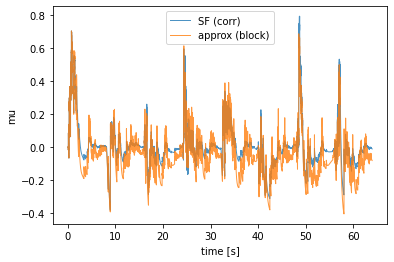

In [169]:
vplt(v,p,key='mu',dim=0,cut=1,c=None,err=True,alpha=0.8)
vplt(v2,p,key='mu',dim=0,cut=1,c=None,err=True,alpha=0.8)
#vplt(v,p,key='Sx',dim=0,cut=1,c=None,err=True,alpha=0.8)
#vplt(v,p,key='y',dim=0,cut=1,c=None,err=True,alpha=0.8)
plt.legend(['SF (corr)','approx (block)','input spikes','output spikes'])

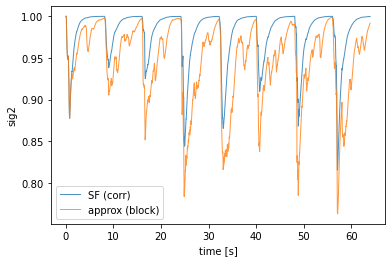

In [170]:
vplt(v,p,key='sig2',dim=0,cut=1,c=None,err=True,alpha=0.8)
vplt(v2,p,key='sig2',dim=0,cut=1,c=None,err=True,alpha=0.8)
plt.legend(['SF (corr)','approx (block)','input spikes','output spikes'])

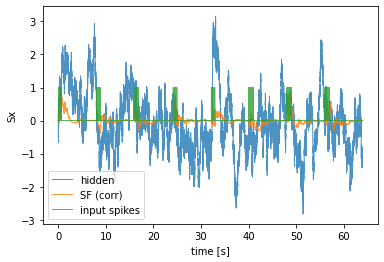

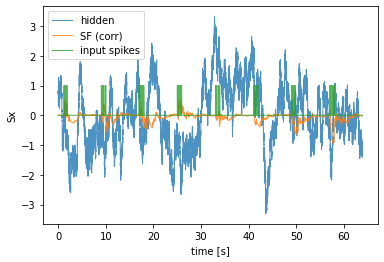

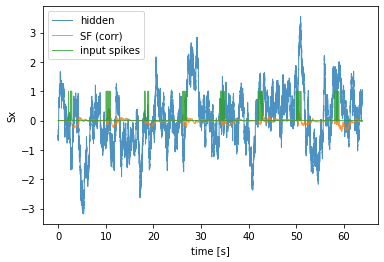

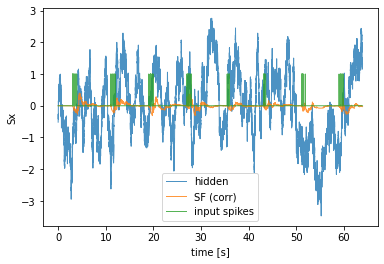

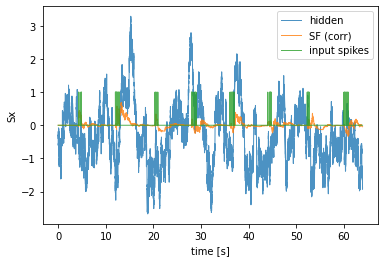

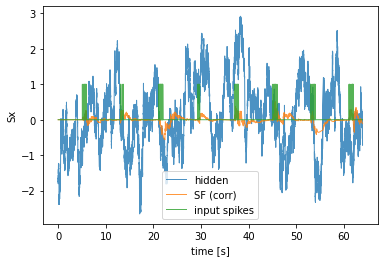

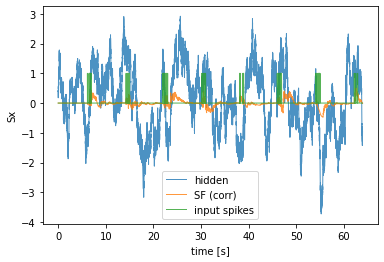

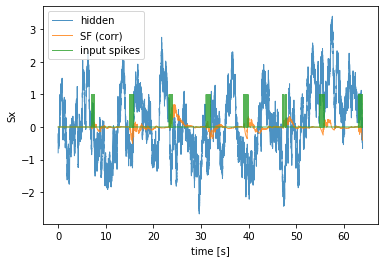

In [171]:
for i in range(0,64,8):
    vplt(v,p,key='w',dim=i,cut=1,c=None,err=True,alpha=0.8)
    vplt(v,p,key='mu',dim=i,cut=1,c=None,err=True,alpha=0.8)
    vplt(v,p,key='Sx',dim=i,cut=1,c=None,err=True,alpha=0.8)
    #vplt(v,p,key='y',dim=1,cut=1,c=None,err=True,alpha=0.8)
    plt.legend(['hidden','SF (corr)','input spikes','output spikes'])

    plt.show(), plt.close()

In [174]:
np.mean(np.mean((v['mu'] - v['w'])**2, axis = 0) / np.var(v['w'], axis = 0))

1.0213094187391643

In [173]:
np.var(v['w'], axis = 0)

array([0.81214829, 0.67293847, 0.78463341, 0.83502294, 1.29426826,
       1.0117037 , 0.99729746, 0.76602935, 1.14040612, 0.79264074,
       0.99829509, 0.91649913, 0.97054465, 0.87841475, 0.69866403,
       0.7642348 , 0.89946264, 1.11195357, 1.07125031, 0.95075857,
       0.87905652, 1.55334717, 1.07438867, 0.81132572, 1.14725656,
       0.94817182, 1.0933658 , 0.94116674, 0.73939636, 1.58735922,
       1.1189573 , 0.95052877, 0.88459334, 0.94503487, 1.16077702,
       1.27257213, 1.10035869, 1.29044518, 1.04821862, 0.72732675,
       0.9304354 , 1.23380126, 1.01832931, 0.96785304, 0.75448674,
       0.69374868, 1.09024329, 0.87400222, 1.19054144, 0.95247042,
       0.86166164, 1.02651713, 1.06736911, 0.86879917, 0.93199121,
       0.98851573, 1.00787214, 0.98062623, 1.19307214, 1.26206271,
       0.95658543, 1.22515482, 0.90639417, 0.90382443])

In [150]:
np.diagonal(np.mean(v['sig2'], axis = 0), axis1 = 0, axis2 = 1).flatten()

array([0.97961303, 0.97544229, 0.98640853, 0.9831352 , 0.98101919,
       0.98004454, 0.98239897, 0.98067514, 0.97890287, 0.98115075,
       0.98469257, 0.98683859, 0.98800408, 0.97889947, 0.9839389 ,
       0.98966172, 0.98287604, 0.98419177, 0.98429435, 0.98912703,
       0.98099326, 0.98559502, 0.98405063, 0.98524356, 0.98470215,
       0.9824512 , 0.98252966, 0.97896151, 0.9918543 , 0.9895094 ,
       0.98735469, 0.98489518, 0.98610822, 0.98554994, 0.98390259,
       0.98321827, 0.98456119, 0.98923445, 0.98523698, 0.98397795,
       0.98029123, 0.98558779, 0.98456715, 0.99058545, 0.990993  ,
       0.98425553, 0.98221174, 0.98492234, 0.98622381, 0.98851395,
       0.98631182, 0.98979843, 0.98365151, 0.98707814, 0.98459628,
       0.98470176, 0.98704314, 0.9842225 , 0.98956691, 0.9912692 ,
       0.98876212, 0.9904655 , 0.98891595, 0.98965744])

In [104]:
sum(np.mean(p['g0'] * np.exp(1/2 * p['beta']**2 * v['x']**2), axis = 0))

64.0024180110731

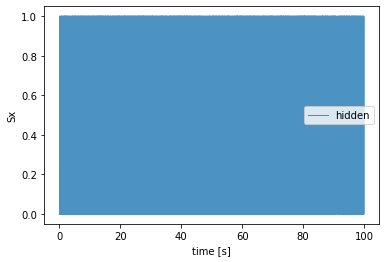

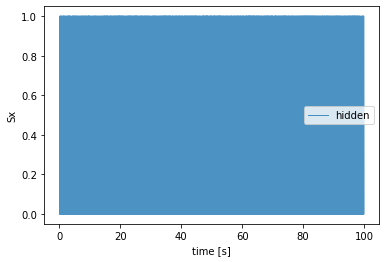

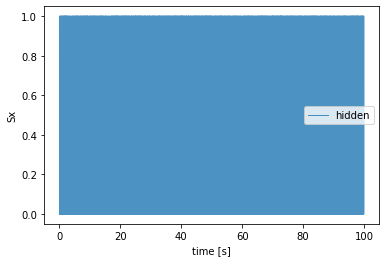

In [35]:
for i in range(p['dim']):
    vplt(v,p,key='Sx',dim=i,cut=1,c=None,err=True,alpha=0.8)
    plt.legend(['hidden','SF (corr)'])

    plt.show(), plt.close()